In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm

sns.set()

limit = 100

In [2]:
def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                 thousands=',',converters={0 : strip})


In [3]:
dick = pd.read_pickle('country_data.pkl')

us_state_dict = pd.read_pickle('us_state_dict.pkl')
ny = us_state_dict['New York']
ny.index = pd.DatetimeIndex(ny.index)
dick['New York'] = ny

ny.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2020-03-14 to 2020-05-08
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   confirmed    56 non-null     float64
 1   deceased     56 non-null     float64
 2   inc          56 non-null     float64
 3   dead_inc     56 non-null     float64
 4   factor       56 non-null     float64
 5   dead_factor  55 non-null     float64
 6   density      56 non-null     float64
 7   gdp          56 non-null     int64  
 8   pct_dead     56 non-null     float64
 9   conf_per_M   56 non-null     float64
 10  dead_per_M   56 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 5.2 KB


In [4]:
def process_country(country_name):
    df = dick[country_name]
    
    df = df[df['confirmed'] > limit]
    
    resample_period = ['W-MON','W-TUE','W-WED','W-THU','W-FRI','W-SAT','W-SUN']
    
    today = pd.datetime.today().weekday()

    yesterday = lambda i : resample_period[i % 7 -1] if i != 0 else resample_period[6]
    print (today)
    print (yesterday(today))
    
    #### MAKE SURE to adjust the param of resample so that all data points for the last week are included
    weekly = df[['inc','dead_inc']].resample(yesterday(today)).sum()
    weekly[['inc_per_M','dead_inc_per_M']] = weekly[['inc','dead_inc']] / (
        country_populations.loc[country_name,'population'] / 1e6)
    ####
    
    weekly['factor'] = weekly['inc'] / weekly['inc'].shift()
    weekly['dead_factor'] = weekly['dead_inc'] / weekly['dead_inc'].shift()
    
    print ('+++++++ {} +++++++'.format(country_name))
    print (weekly)
    
    return weekly
    

In [5]:
def plot(weekly,country_name):
    
    plt.figure(figsize=(18,12))
    
    plt.plot(weekly.index,weekly['inc'],'x--',color='orange',
            label=r'new confirmed')
    plt.plot(weekly.index,weekly['dead_inc'],'x--',color='crimson',
            label = 'new dead')
    
   
    
    plt.plot(weekly.index,weekly['factor'],'o-',color='orange',
            label=r'weekly growth factor confirmed [ last weekly growth factor: {:.2f} ]'.format(weekly['factor'][-1]))
    
    plt.plot(weekly.index,weekly['dead_factor'],'o-',color='crimson',
             label=r'weekly growth factor dead [ last weekly growth factor: {:.2f} ]'.format(weekly['dead_factor'][-1]))
    
    plt.title('Corona - weekly sum of new CONFIRMED and DEAD for {} [confirmed > {}]'.format(str.upper(country_name),limit))
    
    plt.plot(weekly.index, [1] * len(weekly.index),color='lime',ls = 'dashed',label='factor 1.00')
    
    y_max = weekly['inc'].max() * 10
    y_min = 0.1
    
    plt.ylim([y_min,y_max])
    plt.yscale('log')
    plt.ylabel('weekly total')  
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    
    plt.savefig('corona_weekly_sums_{}.jpg'.format(country_name),format='jpg')


5
W-FRI


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


+++++++ Sweden +++++++
               inc  dead_inc   inc_per_M  dead_inc_per_M      factor  \
2020-03-06     7.0       0.0    0.693120        0.000000         NaN   
2020-03-13   713.0       1.0   70.599197        0.099017  101.857143   
2020-03-20   825.0      15.0   81.689113        1.485257    1.157083   
2020-03-27  1430.0      89.0  141.594463        8.812522    1.733333   
2020-04-03  3062.0     253.0  303.190381       25.051328    2.141259   
2020-04-10  3554.0     512.0  351.906797       50.696759    1.160679   
2020-04-17  3531.0     530.0  349.629404       52.479067    0.993528   
2020-04-24  4351.0     752.0  430.823431       74.460864    1.232229   
2020-05-01  3953.0     501.0  391.414623       49.607570    0.908527   
2020-05-08  3745.0     522.0  370.819065       51.686930    0.947382   

            dead_factor  
2020-03-06          NaN  
2020-03-13          inf  
2020-03-20    15.000000  
2020-03-27     5.933333  
2020-04-03     2.842697  
2020-04-10     2.023715  
20

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ Spain +++++++
                inc  dead_inc    inc_per_M  dead_inc_per_M     factor  \
2020-03-06    316.0       5.0     6.758668        0.106941        NaN   
2020-03-13   4832.0     128.0   103.347726        2.737688  15.291139   
2020-03-20  15178.0     910.0   324.629923       19.463251   3.141142   
2020-03-27  45309.0    4095.0   969.077428       87.584631   2.985176   
2020-04-03  53480.0    6060.0  1143.840315      129.612422   1.180339   
2020-04-10  39074.0    4883.0   835.722073      104.438524   0.730628   
2020-04-17  32566.0    3921.0   696.527743       83.863087   0.833444   
2020-04-24  12151.0    2522.0   259.887877       53.941011   0.373119   
2020-05-01  10445.0    2019.0   223.399628       43.182752   0.859600   
2020-05-08   9422.0    1756.0   201.519511       37.557659   0.902058   

            dead_factor  
2020-03-06          NaN  
2020-03-13    25.600000  
2020-03-20     7.109375  
2020-03-27     4.500000  
2020-04-03     1.479853  
2020-04-10

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ Italy +++++++
                inc  dead_inc   inc_per_M  dead_inc_per_M    factor  \
2020-02-28    826.0      19.0   13.661513        0.314248       NaN   
2020-03-06   3748.0     176.0   61.989527        2.910928  4.537530   
2020-03-13  13024.0    1069.0  215.408645       17.680577  3.474920   
2020-03-20  29361.0    2766.0  485.612194       45.747874  2.254377   
2020-03-27  39477.0    5102.0  652.924376       84.383823  1.344539   
2020-04-03  33329.0    5547.0  551.240381       91.743839  0.844264   
2020-04-10  27750.0    4168.0  458.967283       68.936059  0.832608   
2020-04-17  24857.0    3896.0  411.118910       64.437353  0.895748   
2020-04-24  20560.0    3224.0  340.049273       53.322902  0.827131   
2020-05-01  14434.0    2267.0  238.729145       37.494733  0.702043   
2020-05-08   9757.0    1965.0  161.374551       32.499845  0.675973   

            dead_factor  
2020-02-28          NaN  
2020-03-06     9.263158  
2020-03-13     6.073864  
2020-03-20   

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ US +++++++
                 inc  dead_inc   inc_per_M  dead_inc_per_M     factor  \
2020-03-06     164.0       8.0    0.495464        0.024169        NaN   
2020-03-13    1917.0      35.0    5.791494        0.105739  11.689024   
2020-03-20   17094.0     300.0   51.643091        0.906337   8.917058   
2020-03-27   82384.0    1916.0  248.892266        5.788473   4.819469   
2020-04-03  173710.0    6981.0  524.799422       21.090466   2.108540   
2020-04-10  221168.0   13087.0  668.175917       39.537448   1.273202   
2020-04-17  203171.0   15078.0  613.804752       45.552505   0.918627   
2020-04-24  205652.0   14082.0  621.300160       42.543466   1.012211   
2020-05-01  198103.0   13450.0  598.493696       40.634116   0.963292   
2020-05-08  180468.0   12237.0  545.216177       36.969492   0.910981   

            dead_factor  
2020-03-06          NaN  
2020-03-13     4.375000  
2020-03-20     8.571429  
2020-03-27     6.386667  
2020-04-03     3.643528  
2020-04-10   

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ Germany +++++++
                inc  dead_inc   inc_per_M  dead_inc_per_M    factor  \
2020-03-06    591.0       0.0    7.053858        0.000000       NaN   
2020-03-13   3005.0       7.0   35.866061        0.083548  5.084602   
2020-03-20  16173.0      60.0  193.032216        0.716128  5.382030   
2020-03-27  31023.0     275.0  370.273817        3.282252  1.918197   
2020-04-03  40288.0     933.0  480.855866       11.135785  1.298649   
2020-04-10  31012.0    1492.0  370.142527       17.807708  0.769758   
2020-04-17  19226.0    1585.0  229.471180       18.917706  0.619954   
2020-04-24  13602.0    1408.0  162.346145       16.805130  0.707479   
2020-05-01   9078.0     976.0  108.350118       11.649010  0.667402   
2020-05-08   6511.0     774.0   77.711789        9.238047  0.717228   

            dead_factor  
2020-03-06          NaN  
2020-03-13          inf  
2020-03-20     8.571429  
2020-03-27     4.583333  
2020-04-03     3.392727  
2020-04-10     1.599143  
2020

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ Netherlands +++++++
               inc  dead_inc   inc_per_M  dead_inc_per_M     factor  \
2020-03-06    46.0       1.0    2.684584        0.058361        NaN   
2020-03-13   678.0       9.0   39.568431        0.525245  14.739130   
2020-03-20  2197.0      97.0  128.218057        5.660970   3.240413   
2020-03-27  5644.0     440.0  329.386762       25.678628   2.568958   
2020-04-03  7174.0     943.0  418.678354       55.033968   1.271084   
2020-04-10  7428.0    1030.0  433.501925       60.111333   1.035406   
2020-04-17  7370.0     951.0  430.117015       55.500852   0.992192   
2020-04-24  6110.0     833.0  356.582763       48.614311   0.829037   
2020-05-01  3260.0     605.0  190.255288       35.308113   0.533552   
2020-05-08  2303.0     468.0  134.404272       27.312722   0.706442   

            dead_factor  
2020-03-06          NaN  
2020-03-13     9.000000  
2020-03-20    10.777778  
2020-03-27     4.536082  
2020-04-03     2.143182  
2020-04-10     1.092259  


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ Sweden +++++++
               inc  dead_inc   inc_per_M  dead_inc_per_M      factor  \
2020-03-06     7.0       0.0    0.693120        0.000000         NaN   
2020-03-13   713.0       1.0   70.599197        0.099017  101.857143   
2020-03-20   825.0      15.0   81.689113        1.485257    1.157083   
2020-03-27  1430.0      89.0  141.594463        8.812522    1.733333   
2020-04-03  3062.0     253.0  303.190381       25.051328    2.141259   
2020-04-10  3554.0     512.0  351.906797       50.696759    1.160679   
2020-04-17  3531.0     530.0  349.629404       52.479067    0.993528   
2020-04-24  4351.0     752.0  430.823431       74.460864    1.232229   
2020-05-01  3953.0     501.0  391.414623       49.607570    0.908527   
2020-05-08  3745.0     522.0  370.819065       51.686930    0.947382   

            dead_factor  
2020-03-06          NaN  
2020-03-13          inf  
2020-03-20    15.000000  
2020-03-27     5.933333  
2020-04-03     2.842697  
2020-04-10     2.023

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
+++++++ US +++++++
                 inc  dead_inc   inc_per_M  dead_inc_per_M     factor  \
2020-03-06     164.0       8.0    0.495464        0.024169        NaN   
2020-03-13    1917.0      35.0    5.791494        0.105739  11.689024   
2020-03-20   17094.0     300.0   51.643091        0.906337   8.917058   
2020-03-27   82384.0    1916.0  248.892266        5.788473   4.819469   
2020-04-03  173710.0    6981.0  524.799422       21.090466   2.108540   
2020-04-10  221168.0   13087.0  668.175917       39.537448   1.273202   
2020-04-17  203171.0   15078.0  613.804752       45.552505   0.918627   
2020-04-24  205652.0   14082.0  621.300160       42.543466   1.012211   
2020-05-01  198103.0   13450.0  598.493696       40.634116   0.963292   
2020-05-08  180468.0   12237.0  545.216177       36.969492   0.910981   

            dead_factor  
2020-03-06          NaN  
2020-03-13     4.375000  
2020-03-20     8.571429  
2020-03-27     6.386667  
2020-04-03     3.643528  
2020-04-10   

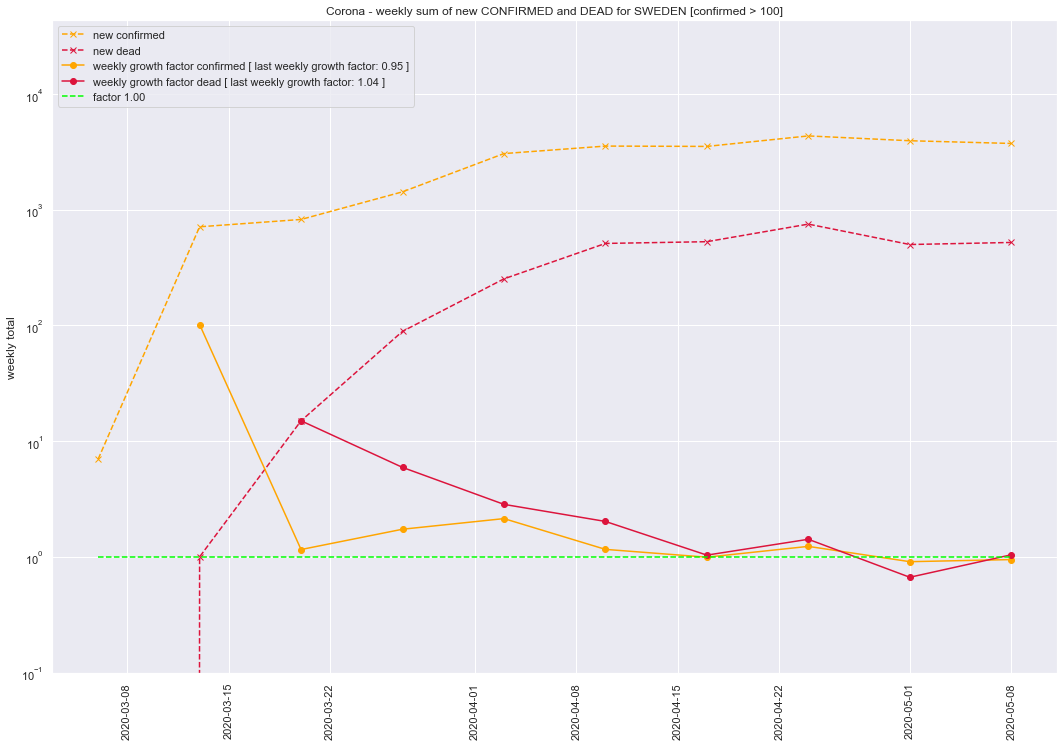

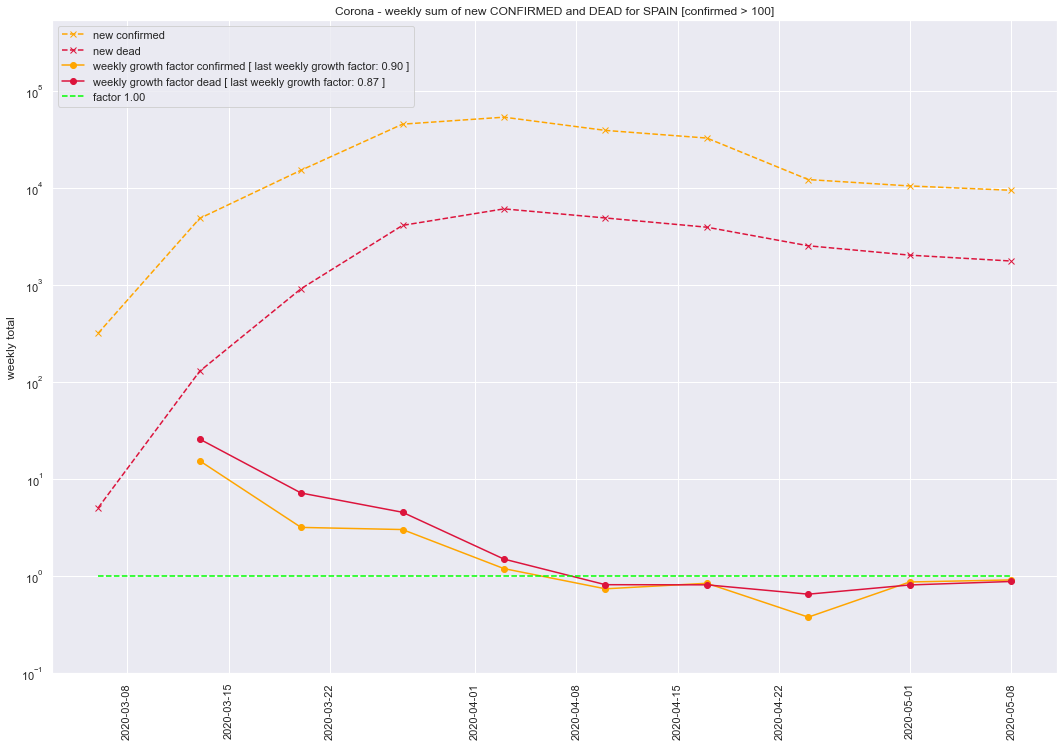

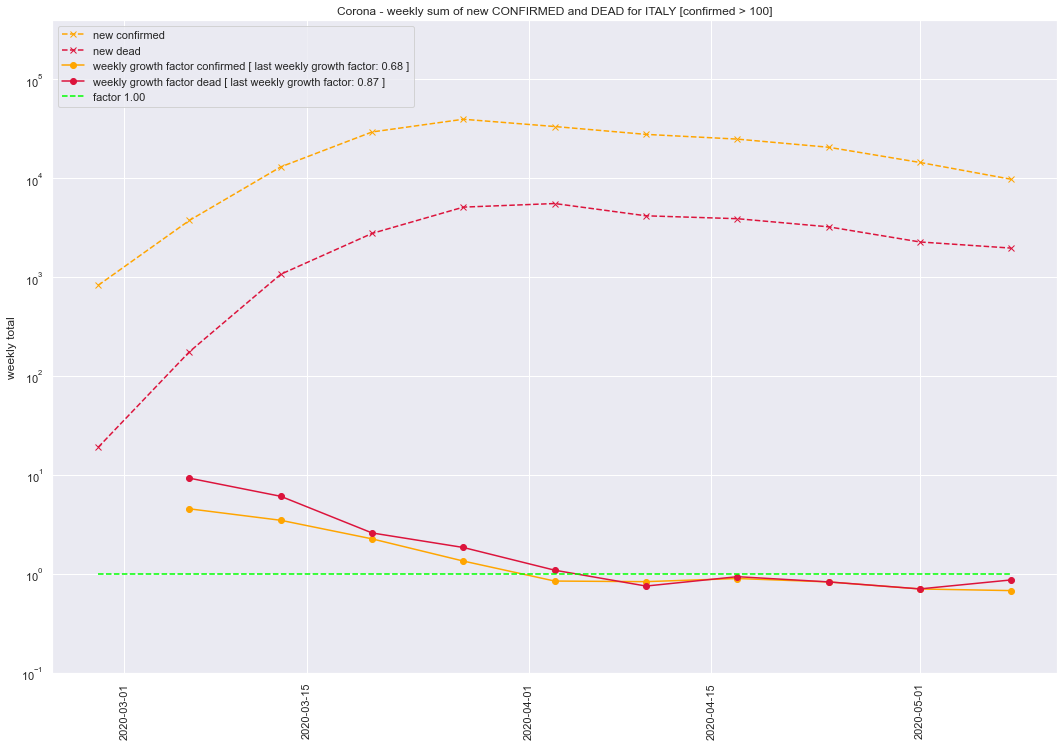

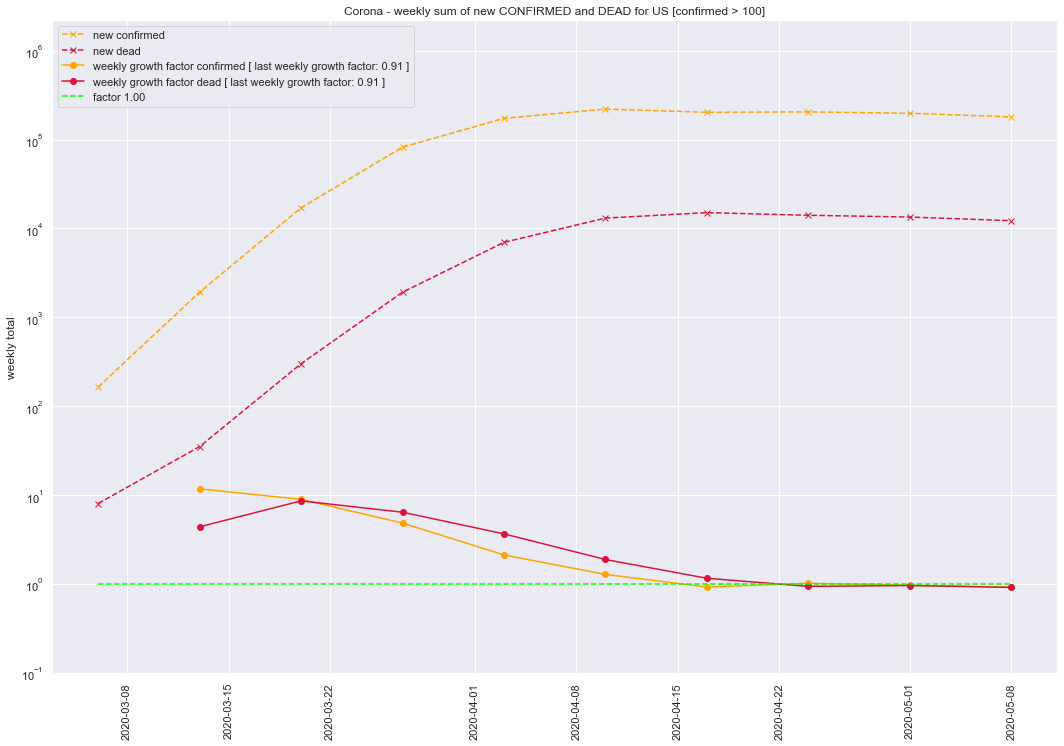

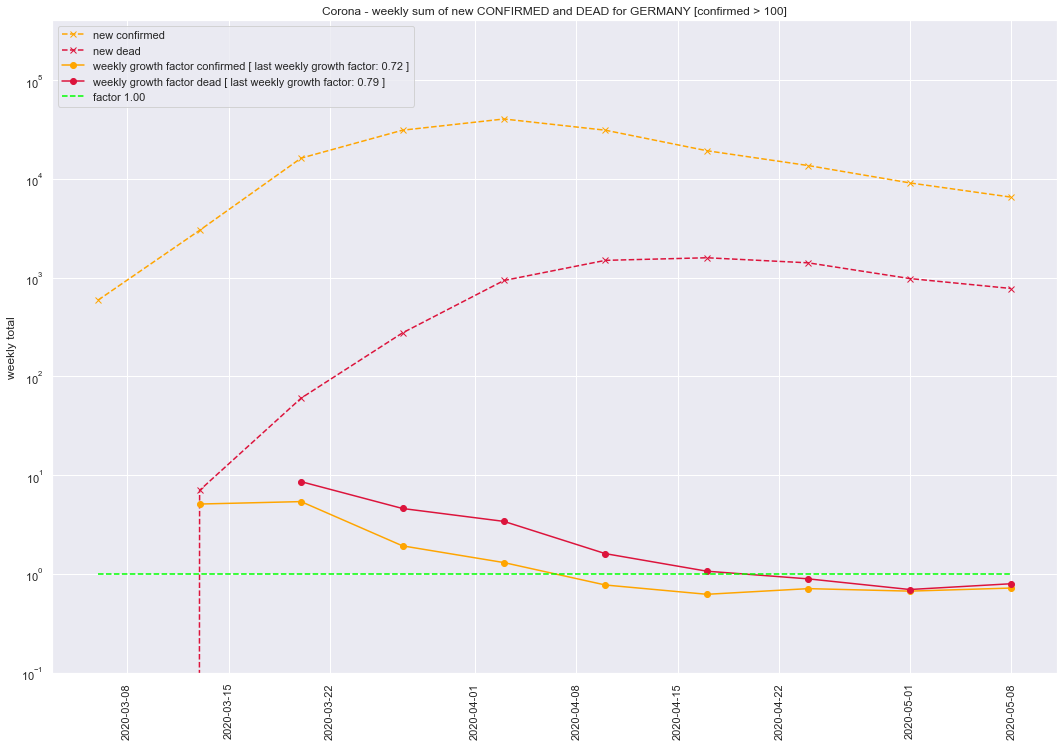

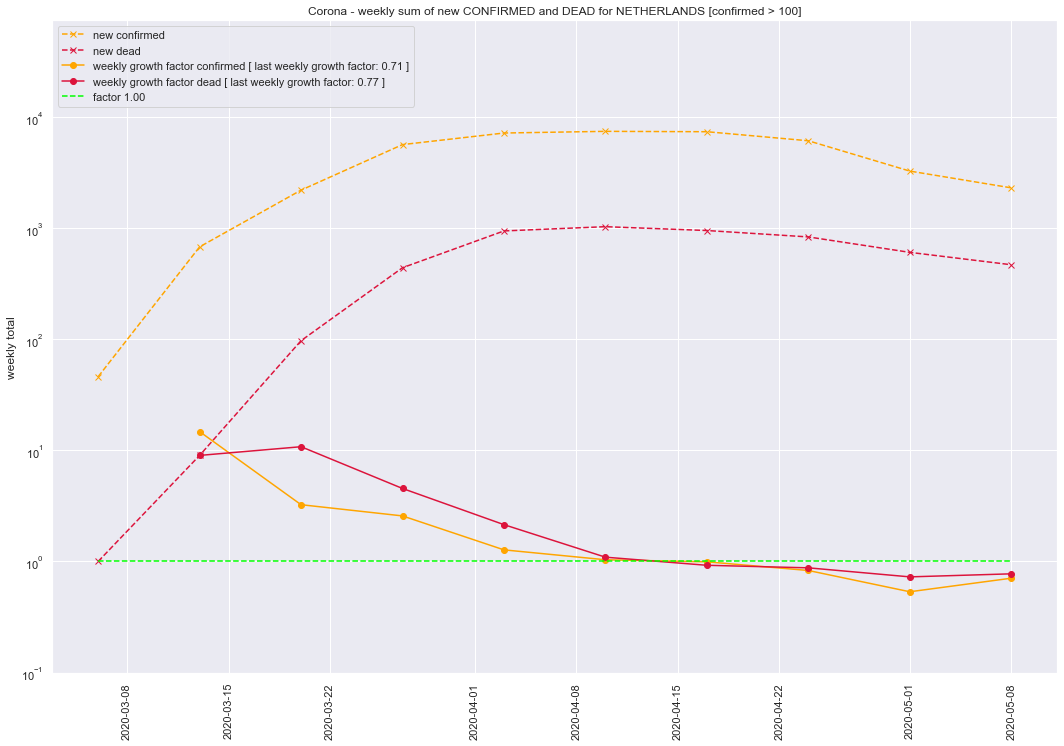

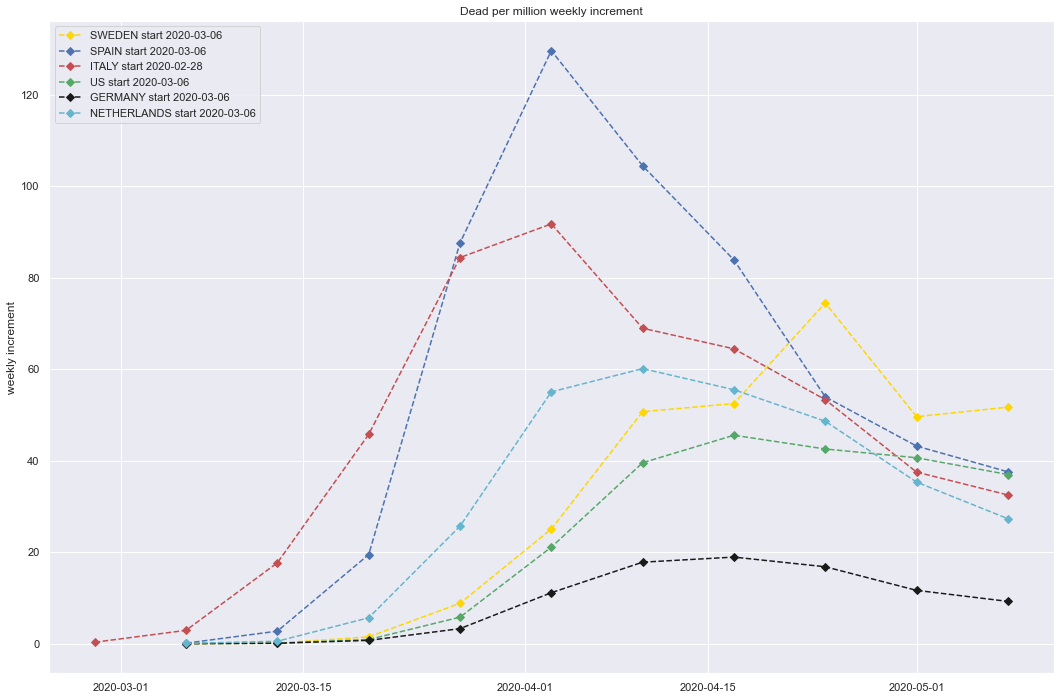

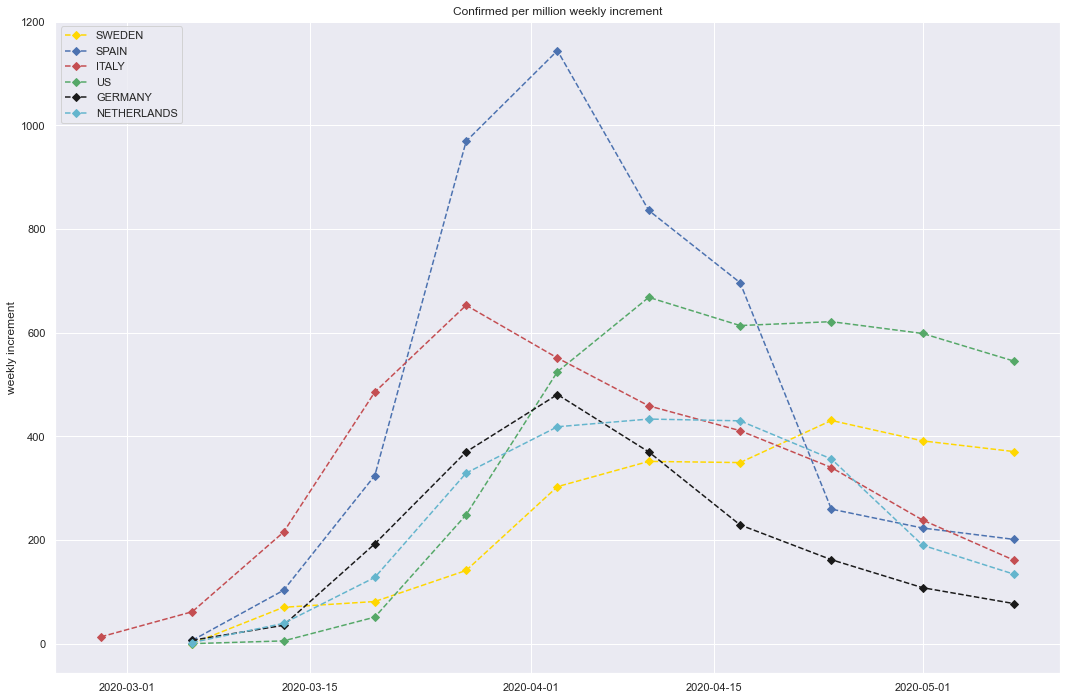

In [6]:
countries = ['Sweden','Spain','Italy','US','Germany','Netherlands']
colors = ['gold','b','r','g','k','c','lime']
#countries = ['Finland','Denmark','Norway','Austria','Belgium','France']
#countries = ['New York']

fignr = 1

for c in countries:
    weekly = process_country(c)
    print ('++++++++++++++++ {} ++++++++++++++'.format(str.upper(c)))
    print (c,weekly.tail(10))
    plot(weekly,c)
    fignr += 1
    


# plot all normalized on same plot

plt.figure(fignr + 1,figsize=(18,12))
plt.figure(fignr + 2,figsize=(18,12))

for i,c in enumerate(countries):
    plt.figure(fignr +1 )
    plt.title('Dead per million weekly increment')
    weekly = process_country(c)
    
    plt.plot(weekly.index,weekly['dead_inc_per_M'],'D--',
             color=colors[i],label=c.upper() + ' start ' + str(weekly.index[0].date()))
    
    #plt.yscale('log') # NOTICE that log scale makes the growth look much smaller...!!!
    
    plt.legend(loc='upper left')
    plt.ylabel('weekly increment')
    plt.figure(fignr + 2)
    plt.title('Confirmed per million weekly increment')
    plt.plot(weekly.index,weekly['inc_per_M'],'D--',color=colors[i],label=c.upper())
    plt.legend(loc='upper left')
    plt.ylabel('weekly increment')

plt.figure(fignr +1)
plt.savefig('weekly__dead_consolidated_sums_per_million.jpg')
plt.figure(fignr +2)
plt.savefig('weekly_conf_consolidated_sums_per_million.jpg')